# Classification and Eventually Dimensionality Reduction  

### Functions: 
- random_train_test(my_df, train_prop=.7) : randomly assigns the same class to each of the 128x128 images with a configurable train test split. Each child image (rotated and cropped) gets the same classification

Note: The index of the first large image is  df_5[86016:] 
cortex_4400_4912__720_1232_110_988.tiff



In [157]:
from skimage import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn import random_projection

import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import warnings
import pandas as pd
warnings.simplefilter('ignore', UserWarning)
%matplotlib notebook
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn import tree
from sklearn.random_projection import GaussianRandomProjection

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

import IPython.display


In [158]:
root_path = '../Images/ims'
df = pd.read_csv("DataSet_V9.csv")
df = df.drop(columns=['Unnamed: 0'])

In [159]:
print(df.shape)

df.isna().sum()

(92160, 21)


fname                           0
Entropy Mean                    0
Entropy Variance                0
Entropy Sum                     0
label                       86016
Number of Events            87040
Max Area                    87040
Average Area                87040
Avg % Diff Width Height     87040
Max % Diff Width Height     87040
Shape Index Mean                0
Shape Index Variance            0
Shape Index Sum                 0
Pixel Intensity Mean            0
Pixel Intensity Variance        0
Pixel Intensity Sum             0
class                           0
train                           0
HOG Mean                        0
HOG Variance                    0
HOG Sum                         0
dtype: int64

In [160]:
# a[a['fname'].str.contains('thalamus_650_1162__600_1112_159_172')].shape

### Reformat the np array into a dataframe. Make a train column to mark train vs test. 

In [161]:
def random_train_test(my_df, train_prop=.7):
    df_temp = my_df.copy()
    if "train" not in df_temp.columns:
        df_temp["train"] = np.nan
    
    df_large = df_temp[86016:] #all 128x128s
    print(df_large.shape, 'should equal 6144')
    
    #only train test split the df_large
    df_large["train"] = np.random.choice([1, 0], len(df_large), p=[train_prop, (1-train_prop)])
    df_large['fname'] = df_large['fname'].str.replace(r'images/','')
    
    
    #update all of the coclumns to match
    # so all children of large image get the same train test label
    for idx in range(0,6144): #for every 128x128 6144
        start_idx = idx*14 # 0 to 13
        end_idx = (start_idx + 13)
        df_temp.loc[start_idx:end_idx]['train'] = df_temp.loc[86016+idx]['train']
    
    return(df_temp)
# df = random_train_test(df,.7 )

In [162]:
df['class'] = np.nan
df['class'] = np.where(df['fname'].str.contains("thalamus"), 1, df['class']).astype(int)
df['class'] = np.where(df['fname'].str.contains("cortex"), 2, df['class']).astype(int)
df['class'] = np.where(df['fname'].str.contains("str"), 3, df['class']).astype(int)

In [163]:
df.head()

,fname,Entropy Mean,Entropy Variance,Entropy Sum,label,Number of Events,Max Area,Average Area,Avg % Diff Width Height,Max % Diff Width Height,...,Shape Index Variance,Shape Index Sum,Pixel Intensity Mean,Pixel Intensity Variance,Pixel Intensity Sum,class,train,HOG Mean,HOG Variance,HOG Sum
0,cortex_4400_4912__720_1232_110_988tile1.tiff,5.253974,0.092016,21520.275982,NaN,NaN,NaN,NaN,NaN,NaN,...,0.245402,297.806247,98.617432,559.998905,403937.0,2,0,0.115039,0.041565,471.200566
1,cortex_4400_4912__720_1232_110_988tile2.tiff,5.178819,0.085072,21212.441308,NaN,NaN,NaN,NaN,NaN,NaN,...,0.248322,314.549026,96.067383,469.289405,393492.0,2,0,0.104810,0.035965,429.301677
2,cortex_4400_4912__720_1232_110_988tile3.tiff,5.172968,0.101148,21188.477362,NaN,NaN,NaN,NaN,NaN,NaN,...,0.243454,320.832122,103.660889,461.527826,424595.0,2,0,0.111318,0.043023,455.960095
3,cortex_4400_4912__720_1232_110_988tile4.tiff,5.099683,0.134162,20888.301343,NaN,NaN,NaN,NaN,NaN,NaN,...,0.249819,288.249616,99.208252,443.160977,406357.0,2,0,0.099454,0.034068,407.362141
4,cortex_4400_4912__720_1232_110_988turn0.tiff,5.162050,0.062711,21143.754782,NaN,NaN,NaN,NaN,NaN,NaN,...,0.250467,318.521426,98.367188,435.089294,402912.0,2,0,0.103424,0.034386,423.624939


If we were going to use sklearn, we would use this for a train test split. However, 
because we have specific preprocessing steps linking the 128x128 patch to its children 
we do our own train test split above

In [164]:
# ent_all_feats = df.as_matrix(columns=df.columns[1:4])
# ent_all_labels = np.asarray(df['class']).reshape(-1,1)

# ent_all_feats.shape, ent_all_labels.shape

# ent_train, ent_test, labels_train, labels_test = train_test_split(ent_all_feats, ent_all_labels, 
#                                     test_size=0.3, random_state=2)

In [165]:
df.columns
df = df.drop(columns=['label',
       'Number of Events', 'Max Area', 'Average Area',
       'Avg % Diff Width Height', 'Max % Diff Width Height'])
df.head()

,fname,Entropy Mean,Entropy Variance,Entropy Sum,Shape Index Mean,Shape Index Variance,Shape Index Sum,Pixel Intensity Mean,Pixel Intensity Variance,Pixel Intensity Sum,class,train,HOG Mean,HOG Variance,HOG Sum
0,cortex_4400_4912__720_1232_110_988tile1.tiff,5.253974,0.092016,21520.275982,0.072707,0.245402,297.806247,98.617432,559.998905,403937.0,2,0,0.115039,0.041565,471.200566
1,cortex_4400_4912__720_1232_110_988tile2.tiff,5.178819,0.085072,21212.441308,0.076794,0.248322,314.549026,96.067383,469.289405,393492.0,2,0,0.104810,0.035965,429.301677
2,cortex_4400_4912__720_1232_110_988tile3.tiff,5.172968,0.101148,21188.477362,0.078328,0.243454,320.832122,103.660889,461.527826,424595.0,2,0,0.111318,0.043023,455.960095
3,cortex_4400_4912__720_1232_110_988tile4.tiff,5.099683,0.134162,20888.301343,0.070373,0.249819,288.249616,99.208252,443.160977,406357.0,2,0,0.099454,0.034068,407.362141
4,cortex_4400_4912__720_1232_110_988turn0.tiff,5.162050,0.062711,21143.754782,0.077764,0.250467,318.521426,98.367188,435.089294,402912.0,2,0,0.103424,0.034386,423.624939


Gets the train/test matricies for features and labels according to train test split

In [166]:
all_features = df.drop(columns=['fname', 'train',  'class'])
all_labels = df['class']


feat_train = df[df['train'] == 1].drop(columns=['fname', 'train',  'class']).as_matrix()
feat_train.shape
feat_test = df[df['train'] == 0].drop(columns=['fname', 'train',  'class']).as_matrix()
feat_test.shape 
label_train = df[df['train'] == 1]['class'].as_matrix().reshape(-1,1)
label_test = df[df['train'] == 0]['class'].as_matrix().reshape(-1,1)
feat_test.shape, feat_train.shape, label_train.shape


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


((27555, 12), (64605, 12), (64605, 1))

In [167]:
df[df['train'] == 1].drop(columns=['fname', 'train',  'class'])
# validating that not feeding in train data

,Entropy Mean,Entropy Variance,Entropy Sum,Shape Index Mean,Shape Index Variance,Shape Index Sum,Pixel Intensity Mean,Pixel Intensity Variance,Pixel Intensity Sum,HOG Mean,HOG Variance,HOG Sum
14,5.200104,0.080674,21299.626381,0.075242,0.245741,308.192834,100.876465,468.930052,413190.0,0.113452,0.042072,464.700013
15,5.187820,0.098317,21249.310654,0.064882,0.253480,265.756969,98.016602,560.520232,401476.0,0.104884,0.036105,429.605459
16,5.184719,0.115901,21236.607451,0.067428,0.248342,276.186371,103.700439,527.388047,424757.0,0.112454,0.043908,460.611436
17,5.027991,0.139392,20594.650285,0.082096,0.240165,336.264796,102.910889,333.912713,421523.0,0.094780,0.031166,388.219733
18,5.083024,0.104495,20820.064723,0.077667,0.246599,318.124744,102.087891,359.630459,418152.0,0.096910,0.033023,396.945229
19,5.090837,0.101411,20852.067583,0.072566,0.245379,297.229680,102.612793,371.926731,420302.0,0.096758,0.033513,396.320742
20,5.105039,0.091801,20910.240019,0.067107,0.250632,274.869851,101.728760,417.185462,416681.0,0.099947,0.034378,409.382710
21,5.095424,0.095602,20870.857112,0.068925,0.248586,282.315803,101.589844,378.164780,416112.0,0.095704,0.032506,392.002773
22,5.080519,0.119319,20809.804197,0.073035,0.250736,299.152652,102.692871,363.990144,420630.0,0.100111,0.034609,410.053143
23,5.083024,0.104495,20820.064723,0.077667,0.246599,318.124744,102.087891,359.630459,418152.0,0.096910,0.033023,396.945224


In [168]:
feat_train


array([[5.20010410e+00, 8.06736538e-02, 2.12996264e+04, ...,
        1.13452152e-01, 4.20721747e-02, 4.64700013e+02],
       [5.18781998e+00, 9.83166627e-02, 2.12493107e+04, ...,
        1.04884145e-01, 3.61046187e-02, 4.29605459e+02],
       [5.18471862e+00, 1.15900736e-01, 2.12366075e+04, ...,
        1.12453964e-01, 4.39075840e-02, 4.60611436e+02],
       ...,
       [5.18357084e+00, 1.55895211e-01, 8.49276247e+04, ...,
        1.17043108e-01, 5.22160193e-02, 1.91763428e+03],
       [5.14084877e+00, 9.32521335e-02, 8.42276662e+04, ...,
        1.07435045e-01, 4.02117691e-02, 1.76021577e+03],
       [4.97532181e+00, 1.28578171e-01, 8.15156726e+04, ...,
        9.27190185e-02, 3.26209614e-02, 1.51910840e+03]])

## Scale

In [169]:
scaler = StandardScaler()
scaler.fit(feat_train)
ent_train = scaler.transform(feat_train)
ent_test = scaler.transform(feat_test)

In [170]:
# ent_train
label_train.shape, label_test.shape, feat_train.shape, ent_train.shape, ent_test.shape

((64605, 1), (27555, 1), (64605, 12), (64605, 12), (27555, 12))

In [171]:
print(ent_train[2])
print(label_train[2])

[ 0.30352385 -0.33492748 -0.25410988 -0.90877759  0.91455125 -1.00871216
 -1.28187668 -0.47216018 -0.4278292   0.25322174  0.07282118 -0.20654455]
[2]


## Train models and score

In [172]:
## Notes on gamma for svc -- takes FOREVER to run. So iterated over a few. .005 initially 94%ish. Then 92% for .0005
# .05 got to 97%
# .1 doing best. 

In [173]:
knn = KNeighborsClassifier(n_neighbors=3).fit(ent_train, label_train)
k_train = knn.score(ent_train, label_train)
k_test = knn.score(ent_test, label_test)
print('knn', k_train, k_test)


svm = LinearSVC().fit(ent_train, label_train)
s_train = svm.score(ent_train, label_train)
s_test = svm.score(ent_test, label_test)
print('svm', s_train, s_test)

ksvm = SVC(gamma=.1, kernel='rbf').fit(ent_train, label_train)
kern_s_train = ksvm.score(ent_train, label_train)
kern_s_test = ksvm.score(ent_test, label_test)
print('ksvm', kern_s_train, kern_s_test)

dtree = tree.DecisionTreeClassifier(max_leaf_nodes=3).fit(ent_train, label_train)
d_train = dtree.score(ent_train, label_train)
d_test = dtree.score(ent_test, label_test)
print('dt', d_train, d_test)

# new_result_train = old_result_train[['Component0', 'Component1','Component2']]
lr = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42).fit(ent_train, label_train)
log_train = lr.score(ent_train, label_train)
log_test = lr.score(ent_test, label_test)
print('lr', log_train, log_test)


report_dict = {'Train Acc': [log_train, k_train, s_train, kern_s_train,d_train], 
               'Test Acc': [log_test, k_test, s_test, kern_s_test, d_test], 
               'Name': ['LR', 'kNN', 'SVM', 'KSVM', 'DT']}
report_df = pd.DataFrame(data=report_dict)
report_df.set_index('Name', inplace=True)
print("Classification Using Engineered Features")
report_df


knn 0.9953099605293708 0.9763382326256578
svm 0.9016794365761164 0.9035020867356197
ksvm 0.9791192632149215 0.9752857920522591
dt 0.8342388360034053 0.8264198874977318


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


lr 0.9026700719758532 0.9052077662856106
Classification Using Engineered Features


,Train Acc,Test Acc
Name,,
LR,0.902670,0.905208
kNN,0.995310,0.976338
SVM,0.901679,0.903502
KSVM,0.979119,0.975286
DT,0.834239,0.826420


In [174]:
report_dict = {'Train Acc': [log_train, k_train, s_train, kern_s_train,d_train], 
               'Test Acc': [log_test, k_test, s_test, kern_s_test, d_test], 
               'Name': ['LR', 'kNN', 'SVM', 'KSVM', 'DT']}
report_df = pd.DataFrame(data=report_dict)
report_df.set_index('Name', inplace=True)
print("Classification Using Engineered Features")
report_df

Classification Using Engineered Features


,Train Acc,Test Acc
Name,,
LR,0.902670,0.905208
kNN,0.995310,0.976338
SVM,0.901679,0.903502
KSVM,0.979119,0.975286
DT,0.834239,0.826420


In [175]:
ent_test

array([[ 7.47732346e-01, -7.89335758e-01, -2.36266675e-01, ...,
         4.07302608e-01, -1.13452436e-01, -1.76352024e-01],
       [ 2.65681070e-01, -9.21449721e-01, -2.55629974e-01, ...,
        -2.02361975e-01, -5.58824520e-01, -2.95817317e-01],
       [ 2.28154919e-01, -6.15595751e-01, -2.57137345e-01, ...,
         1.85540762e-01,  2.51190281e-03, -2.19806810e-01],
       ...,
       [ 1.80595457e+00, -1.17957430e+00,  3.99474271e+00, ...,
         1.74447705e+00,  1.76739464e+00,  4.90230715e+00],
       [ 6.79647003e-01, -7.57391495e-02,  3.81377417e+00, ...,
         6.50578302e-01,  1.20641310e+00,  4.04489842e+00],
       [ 1.18502487e+00, -6.43616819e-01,  3.89497534e+00, ...,
         8.93968858e-01,  1.13375966e+00,  4.23567036e+00]])

In [176]:
k_test_arr = knn.predict(ent_test)
s_test_arr = svm.predict(ent_test)
kern_s_test_arr = ksvm.predict(ent_test)
d_test_arr = dtree.predict(ent_test)
log_test_array = lr.predict(ent_test)

d = {'True Label': label_test.tolist(), 'kNN': k_test_arr.tolist(), 'SVM': s_test_arr.tolist(),'kSVM': kern_s_test_arr.tolist(),'DTree': d_test_arr.tolist(),'LR': log_test_array.tolist()}
pred_df = pd.DataFrame(data=d)

In [178]:
report_df.to_csv("report_no_dim_red.csv")
pred_df.to_csv("predictions_no_dim_red.csv")
report_df

,Train Acc,Test Acc
Name,,
LR,0.902670,0.905208
kNN,0.995310,0.976338
SVM,0.901679,0.903502
KSVM,0.979119,0.975286
DT,0.834239,0.826420


## Dim reduction: Code to plot in 3d and with cross sections of top 3 components


In [19]:
%matplotlib notebook
%pylab
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [20]:
def plot_3d(result, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    colors = {1:'m', 2:'y', 3:'b'}

    ax.scatter(result['Component0'], result['Component1'], result['Component2'], 
               c=result['label'].apply(lambda x: colors[x]), s=60)
    xAxisLine = ((min(result['Component0']), max(result['Component0'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
    yAxisLine = ((0, 0), (min(result['Component1']), max(result['Component1'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
    zAxisLine = ((0, 0), (0,0), (min(result['Component2']), max(result['Component2'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

    # label the axes
    ax.set_xlabel("Component1")
    ax.set_ylabel("Component2")
    ax.set_zlabel("Component3")
    ax.set_title(title)

In [21]:
def plot_crosses(result, title):
    colors = {1:'m', 2:'y', 3:'b'}
    fig, axes = plt.subplots(1, 3, figsize=(9, 3))
    fig.suptitle(title, fontsize=16)
    fig.subplots_adjust(top=0.8)
    axes[0].scatter(result['Component0'], result['Component1'], 
                    c=result['label'].apply(lambda x: colors[x]), s=60)
    axes[0].set_title('Comp. 0 vs 1')
    axes[1].scatter(result['Component1'], result['Component2'], 
                    c=result['label'].apply(lambda x: colors[x]), s=60)
    axes[1].set_title('Comp. 1 vs 2')
    axes[2].scatter(result['Component0'], result['Component2'], 
                    c=result['label'].apply(lambda x: colors[x]), s=60)
    axes[2].set_title('Comp. 0 vs 2')
    plt.show()
    

In [22]:
## making extra special sure not changing the results 
ent_train_copy_pca = np.copy(ent_train)
ent_train_copy_pca_5 = np.copy(ent_train)
ent_train_copy_scaled_pca = np.copy(ent_train)
ent_train_copy_kpca = np.copy(ent_train)
ent_train_copy_sckpca = np.copy(ent_train)
ent_train_copy_grp = np.copy(ent_train)

ent_test_copy_pca = np.copy(ent_test)
ent_test_copy_pca_5 = np.copy(ent_test)
ent_test_copy_scaled_pca = np.copy(ent_test)
ent_test_copy_kpca = np.copy(ent_test)
ent_test_copy_sckpca = np.copy(ent_test)
ent_test_copy_grp = np.copy(ent_test)

# ent_train_copy6 = np.copy(ent_train)

## Skip this if you already have the csvs local! Go to the consolidate part

<IPython.core.display.Javascript object>


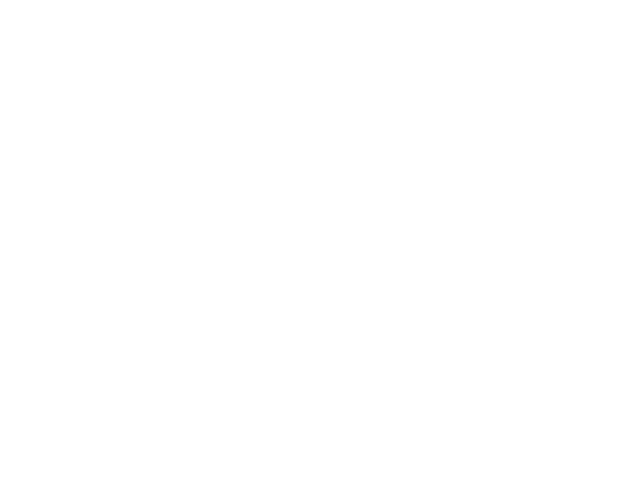

In [23]:
pca = PCA(n_components=3)
pca_features = pca.fit_transform(ent_train_copy_pca)
result_pca =pd.DataFrame(pca_features, columns=['Component%i' % i for i in range(3)])
result_pca['label'] = label_train

plot_3d(result_pca, "PCA: Projection")

<IPython.core.display.Javascript object>


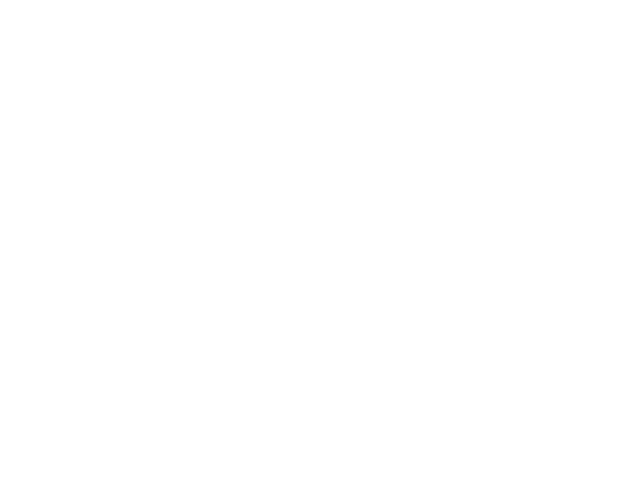

In [24]:
pca_5 = PCA(n_components=5)
pca_features_5 = pca_5.fit_transform(ent_train_copy_pca_5)
result_pca_5 =pd.DataFrame(pca_features_5, columns=['Component%i' % i for i in range(5)])
result_pca_5['label'] = label_train

plot_3d(result_pca_5, "PCA: Projection")

In [28]:
result_pca_5.to_csv("result_scaled_pca_train_5.csv", index=True)
result_pca_test_5 = pca_5.transform(StandardScaler().fit_transform(ent_test_copy_pca_5))

result_pca_test_5=pd.DataFrame(result_pca_test_5, columns=['Component%i' % i for i in range(5)])
result_pca_test_5['label'] = label_test
result_pca_test_5.to_csv("result_scaled_pca_test_5.csv", index=True)


In [ ]:
# result_pca_test_5 = result_pca_test_5.drop(columns=['Unnamed: 0'])
# # 
# result_pca_test_5.shape

In [ ]:
# ent_train == ent_train_copy
# ent_train[1:] = 2342345
# ent_train == ent_train_copy2

<IPython.core.display.Javascript object>


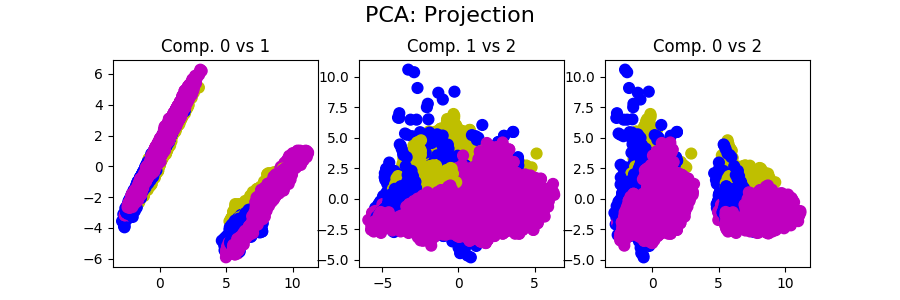

In [29]:
plot_crosses(result_pca, "PCA: Projection")

In [ ]:
result_pca
np.save("result_pca_train.npy", result_pca)

In [30]:
result_pca.to_csv("result_pca_train.csv", index=True)
result_pca_test = pca.transform(StandardScaler().fit_transform(ent_test_copy_pca))

result_pca_test=pd.DataFrame(result_pca_test, columns=['Component%i' % i for i in range(3)])
result_pca_test['label'] = label_test
result_pca_test.to_csv("result_pca_test.csv", index=True)

<IPython.core.display.Javascript object>


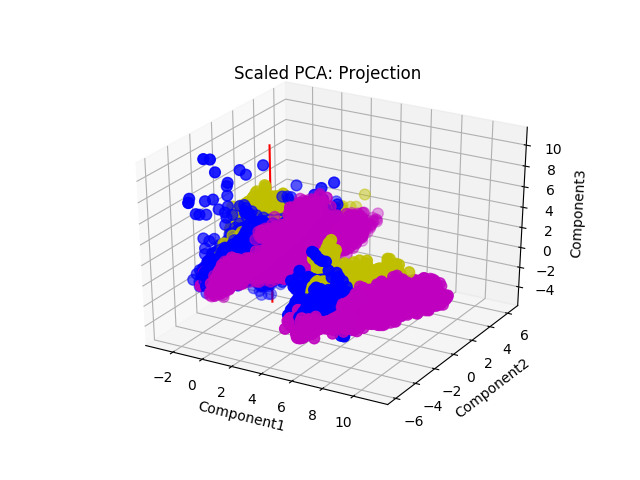

In [31]:
# pca_features = PCA(n_components=3).fit_transform(stacked_chroma)
spca = PCA(n_components=3)
spca_features = spca.fit_transform(StandardScaler().fit_transform(ent_train_copy_scaled_pca))
scaled_result=pd.DataFrame(spca_features, columns=['Component%i' % i for i in range(3)])
scaled_result['label'] = label_train

plot_3d(scaled_result, "Scaled PCA: Projection")

In [32]:
scaled_result.to_csv("result_scaled_pca_train.csv", index=True)
scaled_result_test = spca.transform(StandardScaler().fit_transform(ent_test_copy_scaled_pca))

scaled_result_test=pd.DataFrame(scaled_result_test, columns=['Component%i' % i for i in range(3)])
scaled_result_test['label'] = label_test
scaled_result_test.to_csv("result_scaled_pca_test.csv", index=True)


# np.save("result_scaled_pca_train.npy", scaled_result)
# scaled_result_test.to_csv("result_scaled_pca_train.csv", index=True)
# np.save("result_scaled_pca_test.npy", scaled_result_test)

In [ ]:
## This appears to kill the kernel due to memory. So sampling ransomly half of the samples 

In [ ]:
kPCA = KernelPCA(n_components=3, kernel='rbf', gamma=.1, fit_inverse_transform=True)

## this kills the kernel. so must halve the training size to fit into memory'

ent_train_copy_kpca.shape
sampled_arr = np.random.choice(ent_train_copy_kpca.shape[0], size = math.floor(ent_train_copy_kpca.shape[0]/2.25)) 
print(ent_train_copy_kpca.shape, sampled_arr.shape)
sampled_arr = ent_train_copy_kpca[sampled_arr.tolist()]
# sampled_arr.shape

kernel_result = kPCA.fit_transform(sampled_arr)#.transform(mel_train)


In [39]:
# must scale all 
kernel_result = kPCA.transform(ent_train_copy_kpca)
kernel_result = pd.DataFrame(kernel_result, columns=['Component%i' % i for i in range(3)])
kernel_result['label'] = label_train
kernel_result.to_csv("result_kernel_pca_train.csv", index=True)
kernel_result_test = kPCA.transform(StandardScaler().fit_transform(ent_test_copy_kpca))

kernel_result_test=pd.DataFrame(kernel_result_test, columns=['Component%i' % i for i in range(3)])
kernel_result_test['label'] = label_test
kernel_result_test.to_csv("result_kernel_pca_test.csv", index=True)


NameError: name 'kPCA' is not defined

In [ ]:
# kernel_result

In [ ]:
kernel_result['label'] = label_train
plot_3d(kernel_result, "KPCA: Projection")

In [ ]:
# sckPCA = KernelPCA(n_components=3, kernel='rbf', gamma=.1, fit_inverse_transform=True)
# sckernel_result = sckPCA.fit_transform(StandardScaler().fit_transform(ent_train_copy_sckpca))
# sckernel_result=pd.DataFrame(sckernel_result, columns=['Component%i' % i for i in range(3)])

# sckernel_result['label'] = label_train
# plot_3d(sckernel_result, "Kernel Scaled PCA")

In [ ]:
from sklearn.random_projection import GaussianRandomProjection
GRP = GaussianRandomProjection(n_components=3,eps = 0.5, random_state=2019)
grp_result = GRP.fit_transform(ent_train_copy_grp)

grp_result = pd.DataFrame({'Component0': grp_result.T[0], 'Component1':grp_result.T[1],'Component2':grp_result.T[2]})
grp_result['label'] = label_train
plot_3d(grp_result, "GRP: Projection")

In [ ]:
grp_result.to_csv("result_grp_train.csv", index=True)
grp_result_test = GRP.transform(StandardScaler().fit_transform(ent_test_copy_grp))

grp_result_test=pd.DataFrame(grp_result_test, columns=['Component%i' % i for i in range(3)])
grp_result_test['label'] = label_test
grp_result_test.to_csv("result_grp_test.csv", index=True)


# np.save("result_grp_train.npy", grp_result)
# grp_result_test = GRP.fit(StandardScaler().fit_transform(ent_test_copy_grp))
# np.save("result_grp_test.npy", grp_result_test)
# grp_result_test

### Visualize

In [ ]:
plot_3d(result_pca, "PCA Proj: 3 Components")
plot_3d(result_pca_5, "PCA Proj: 5 Components")
plot_3d(scaled_result, "Scaled PCA Proj")
plot_3d(kernel_result, "KPCA Proj")
plot_3d(grp_result, "GRP Proj")



In [ ]:
plot_crosses(result_pca, "PCA Proj")
plot_crosses(result_pca_5, "PCA Proj: 5 Components")
plot_crosses(scaled_result, "Scaled PCA Proj")
plot_crosses(kernel_result, "KPCA Proj")
# plot_crosses(sckernel_result, "scKPCA Proj")
# plot_crosses(mds_result, "MDS: Cromagram")
# plot_crosses(iso_result, "ISOMAP: Chromagram")
plot_crosses(grp_result, "GRP Proj")

# Consolidating everything to one place :  

result_pca.to_csv("result_pca_train.csv", index=True)   
result_pca_test.to_csv("result_pca_test.csv", index=True)


scaled_result.to_csv("result_scaled_pca_train.csv", index=True)  
scaled_result_test.to_csv("result_scaled_pca_test.csv", index=True)

kernel_result.to_csv("result_kernel_pca_train.csv", index=True)  
kernel_result_test.to_csv("result_kernel_pca_test.csv", index=True)

grp_result.to_csv("result_grp_train.csv", index=True)  
grp_result_test.to_csv("result_grp_test.csv", index=True)


In [141]:
result_pca_test = pd.read_csv("result_pca_test.csv") 
result_pca = pd.read_csv("result_pca_train.csv") 

scaled_result_test = pd.read_csv("result_scaled_pca_test.csv") 
scaled_result = pd.read_csv("result_scaled_pca_train.csv") 

kernel_result = pd.read_csv("result_kernel_pca_train.csv") 
kernel_result_test = pd.read_csv("result_kernel_pca_test.csv") 

grp_result = pd.read_csv("result_grp_train.csv") 
grp_result_test = pd.read_csv("result_grp_test.csv") 

In [142]:

result_pca_5 = pd.read_csv("result_scaled_pca_train_5.csv") 
result_pca_test_5 = pd.read_csv("result_scaled_pca_test_5.csv")

In [143]:
result_pca.drop(columns=['Unnamed: 0', 'label'], inplace=True)
result_pca_5.drop(columns=['Unnamed: 0', 'label'], inplace=True)
scaled_result.drop(columns=['Unnamed: 0', 'label'], inplace=True)
kernel_result.drop(columns=['Unnamed: 0'], inplace=True)  # no label
grp_result.drop(columns=['Unnamed: 0', 'label'], inplace=True)


In [151]:
result_pca_test.drop(columns=['Unnamed: 0', 'label'], inplace=True)
result_pca_test_5.drop(columns=['Unnamed: 0', 'label'], inplace=True)
scaled_result_test.drop(columns=['Unnamed: 0', 'label'], inplace=True)
kernel_result_test.drop(columns=['Unnamed: 0', 'label'], inplace=True) # no label
grp_result_test.drop(columns=['Unnamed: 0', 'label'], inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [89]:
result_pca.head()

,Component0,Component1,Component2
0,-0.446814,0.182321,1.266593
1,-0.576724,-0.446355,2.772940
2,-0.361330,0.135201,1.899558
3,-1.507316,-1.384467,0.128860
4,-1.163292,-1.068442,1.050009


In [90]:
result_pca_test.head()

,Component0,Component1,Component2
0,-0.337620,0.361984,1.575382
1,-0.782772,-0.465991,1.689003
2,-0.559190,0.108780,0.785239
3,-1.020288,-1.035078,2.065080
4,-0.777343,-0.540717,1.683446


## Test accuracy after using PCA

In [91]:
# def log_reg_pred(data_type, old_result_train, model): #model is the fitted reducer
#     new_test = model.transform(data_type) #project to 3d
#     new_result_train = old_result_train[['Component0', 'Component1','Component2']]
#     lr = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42).fit(new_result_train, labels_train)
#     a = lr.score(new_result_train, labels_train)
#     b = lr.score(new_test, labels_test)
#     return(a, b)

# def kNN_pred(data_type,old_result_train, model):
#     new_test = model.transform(data_type)
#     new_result_train = old_result_train[['Component0', 'Component1','Component2']]
#     knn = KNeighborsClassifier(n_neighbors=3).fit(new_result_train, labels_train)
#     a = knn.score(new_result_train, labels_train)
#     b = knn.score(new_test, labels_test)
#     return(a, b)


# def svm_pred(data_type,old_result_train, model):
#     new_test = model.transform(data_type)
#     new_result_train = old_result_train[['Component0', 'Component1','Component2']]
#     svm = LinearSVC().fit(new_result_train, labels_train)
#     a = svm.score(new_result_train, labels_train)
#     b = svm.score(new_test, labels_test)
#     return(a, b)

# def kernel_svm_pred(data_type,old_result_train, model,gamma_in='auto'):
#     new_test = model.transform(data_type)
#     new_result_train = old_result_train[['Component0', 'Component1','Component2']]
#     svm = SVC(gamma=gamma_in, kernel='rbf').fit(new_result_train, labels_train)
#     a = svm.score(new_result_train, labels_train)
#     b = svm.score(new_test, labels_test)
#     return(a, b)

# def dt_pred(data_type,old_result_train, model):
#     new_test = model.transform(data_type)
#     new_result_train = old_result_train[['Component0', 'Component1','Component2']]
#     dtree = tree.DecisionTreeClassifier(max_leaf_nodes=3).fit(new_result_train, labels_train)
#     a = dtree.score(new_result_train, labels_train)
#     b = dtree.score(new_test, labels_test)
# #     a = dtree.score(new_result_train, labels_train)
# #     b = dtree.score(new_test, labels_test)
#     return(a, b)
# # clf = tree.DecisionTreeClassifier()

In [129]:
def score_all_classifiers(transformed_train, transformed_test): 
   # also want to get a dataframe with the predictions: 
    # 

    knn = KNeighborsClassifier(n_neighbors=3).fit(transformed_train, label_train)
    k_train = knn.score(transformed_train, label_train)
    k_test = knn.score(transformed_test, label_test)
    print('knn',k_train, k_test)


    svm = LinearSVC().fit(transformed_train, label_train)
    s_train = svm.score(transformed_train, label_train)
    s_test = svm.score(transformed_test, label_test)
    print('svm', s_train, s_test)

    ksvm = SVC(gamma=.1, kernel='rbf').fit(transformed_train, label_train)
    kern_s_train = ksvm.score(transformed_train, label_train)
    kern_s_test = ksvm.score(transformed_test, label_test)
    print('ksvm', kern_s_train, kern_s_test)


    dtree = tree.DecisionTreeClassifier(max_leaf_nodes=3).fit(transformed_train, label_train)
    d_train = dtree.score(transformed_train, label_train)
    d_test = dtree.score(transformed_test, label_test)
    print('dt', d_train, d_test)

    # new_result_train = old_result_train[['Component0', 'Component1','Component2']]
    lr = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42).fit(transformed_train, label_train)
    log_train = lr.score(transformed_train, label_train)
    log_test = lr.score(transformed_test, label_test)
    
    print('lr', log_train, log_test)
    
    report_dict = {'Train Acc': [log_train, k_train, s_train, kern_s_train,d_train], 
               'Test Acc': [log_test, k_test, s_test, kern_s_test, d_test], 
               'Name': ['LR', 'kNN', 'SVM', 'KSVM', 'DT']}
    
    report_df = pd.DataFrame(data=report_dict)
    report_df.set_index('Name', inplace=True)
    
    
    k_test_arr = knn.predict(transformed_test)
    s_test_arr = svm.predict(transformed_test)
    kern_s_test_arr = ksvm.predict(transformed_test)
    d_test_arr = dtree.predict(transformed_test)
    log_test_array = lr.predict(transformed_test)
    
    d = {'True Label': label_test.tolist(), 'kNN': k_test_arr.tolist(), 'SVM': s_test_arr.tolist(),'kSVM': kern_s_test_arr.tolist(),'DTree': d_test_arr.tolist(),'LR': log_test_array.tolist()}
    pred_df = pd.DataFrame(data=d)
    
#     return(k_train, k_test, s_train, s_test, kern_s_train, kern_s_test, d_train, d_test, log_train, log_test)
    return(report_df, pred_df)

In [124]:
# def get_preds_classifiers(transformed_train, transformed_test): 
#    # also want to get a dataframe with the predictions:     
#     knn = KNeighborsClassifier(n_neighbors=3).fit(transformed_train, label_train)
#     k_test_arr = knn.predict(transformed_test)
#     print("knn")

#     svm = LinearSVC().fit(transformed_train, label_train)
#     s_test_arr = svm.predict(transformed_test)
#     print("svm")
    
#     ksvm = SVC(gamma=.1, kernel='rbf').fit(transformed_train, label_train)
#     kern_s_test_arr = ksvm.predict(transformed_test)
#     print("ksvm")

#     dtree = tree.DecisionTreeClassifier(max_leaf_nodes=3).fit(transformed_train, label_train)
#     d_test_arr = dtree.predict(transformed_test)
#     print("dtree")

#     # new_result_train = old_result_train[['Component0', 'Component1','Component2']]
#     lr = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42).fit(transformed_train, label_train)
#     log_test_array = lr.predict(transformed_test)
#     print('lr', log_test_array)
    
#     d = {'True Label': label_test.tolist(), 'kNN': k_test_arr.tolist(), 'SVM': s_test_arr.tolist(),'DTree': d_test_arr.tolist(),'LR': log_test_array.tolist()}
#     pred_df = pd.DataFrame(data=d)
#     return(pred_df)
    
    

### Get the score reports and the predictions for each dim reducer and each classifier

In [125]:
result_pca.head()

,Component0,Component1,Component2
0,-0.446814,0.182321,1.266593
1,-0.576724,-0.446355,2.772940
2,-0.361330,0.135201,1.899558
3,-1.507316,-1.384467,0.128860
4,-1.163292,-1.068442,1.050009


In [126]:
# scaled_report_df

In [130]:
# pca
scaled_report_df, scaled_pred_df = score_all_classifiers(result_pca, result_pca_test)
scaled_report_df.to_csv("report_pca.csv")
scaled_pred_df.to_csv("predictions_pca.csv")

print("Done")

knn 0.9359182725795218 0.7266920704046452
svm 0.6705827722312514 0.681727454182544
ksvm 0.7722931661636097 0.776701143168209
dt 0.5995975543688569 0.5943385955362003


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


lr 0.6714031421716585 0.682308111050626
Done


In [131]:
# scaled pca
scaled_report_df, scaled_pred_df = score_all_classifiers(scaled_result, scaled_result_test)
scaled_pred_df.to_csv("predictions_scaled_pca.csv")
scaled_report_df.to_csv("report_scaled_pca.csv")
print("Done")

knn 0.9359182725795218 0.7266920704046452
svm 0.6705982509093723 0.6817637452367992
ksvm 0.7722931661636097 0.776701143168209
dt 0.5995975543688569 0.5943385955362003
lr 0.6714031421716585 0.682308111050626


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Done


In [136]:
print(scaled_result.shape, scaled_result_test.shape)
print(kernel_result.shape, kernel_result_test.shape)

(64605, 3) (27555, 3)
(64605, 3) (64605, 3)


In [149]:
print(kernel_result.shape, kernel_result_test.shape)
kernel_result_test.dro[]

(64605, 3) (27555, 4)


,Component0,Component1,Component2,label
0,-0.068647,-0.556080,0.068993,2
1,-0.225920,-0.534403,0.191302,2
2,-0.190482,-0.450459,-0.110887,2
3,-0.311829,-0.460064,0.309372,2
4,-0.190215,-0.514332,0.225962,2
5,0.009723,-0.351624,0.399751,2
6,0.001860,-0.430542,0.373277,2
7,-0.115119,-0.483591,0.327000,2
8,-0.025525,-0.418888,0.390816,2
9,-0.190215,-0.514332,0.225962,2


In [153]:
# kpca
scaled_report_df, scaled_pred_df = score_all_classifiers(kernel_result, kernel_result_test)

scaled_report_df = pd.DataFrame(data=report_dict)
scaled_report_df.set_index('Name', inplace=True)
scaled_pred_df.to_csv("predictions_kpca.csv")
scaled_report_df.to_csv("report_kpca.csv")
print("Done")

knn 0.9518148750096742 0.8044637996733806
svm 0.7280396254159894 0.7364906550535293
ksvm 0.7625106415912081 0.7702050444565415
dt 0.6900085132729665 0.6955543458537471


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


lr 0.7279777107035059 0.7360551624024678
Done


In [134]:
# grp
scaled_report_df, scaled_pred_df = score_all_classifiers(grp_result, grp_result_test)
scaled_pred_df.to_csv("predictions_grp.csv")
scaled_report_df.to_csv("report_grp.csv")
print("Done")

knn 0.9334726414364213 0.7270549809471966
svm 0.7289683461032428 0.7298131010705861
ksvm 0.7725563036916647 0.7702413355107965
dt 0.667874003560096 0.6688441299219743


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


lr 0.7281015401284731 0.7296316457993105
Done


In [147]:
# pca
scaled_report_df, scaled_pred_df = score_all_classifiers(result_pca_5, result_pca_test_5)
scaled_pred_df.to_csv("predictions_scaled_pca_5.csv")
scaled_report_df.to_csv("report_scaled_pca_5.csv")
print("Done")

knn 0.9831282408482316 0.9193975684993649
svm 0.8112684776720068 0.8180366539647976
ksvm 0.9456543611175605 0.9393576483396843
dt 0.7613033046977788 0.7636726546906187


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


lr 0.8113768284188531 0.8199963708945744
Done


In [146]:
# 5 component PCA
scaled_report_df, scaled_pred_df = score_all_classifiers(result_pca_5, result_pca_test_5)
scaled_pred_df.to_csv("predictions_scaled_pca_5.csv")
scaled_report_df.to_csv("report_scaled_pca_5.csv")
print("Done")
# scaled_report_df


knn 0.9831282408482316 0.9193975684993649
svm 0.8112994350282486 0.8180003629105426
ksvm 0.9456543611175605 0.9393576483396843
dt 0.7613033046977788 0.7636726546906187


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


lr 0.8113768284188531 0.8199963708945744
Done


In [ ]:
# scaled_report_df, scaled_pred_df = score_all_classifiers(scaled_result, scaled_result_test)
# scaled_pred_df.to_csv("predictions_scaled_pca_predictions.csv")
# scaled_report_df.to_csv("report_scaled_pca_predictions.csv")

In [ ]:
scaled_pred_df.head()

Get the scores and return a df  
Get the predictions and return df

In [ ]:
# k_train, k_test, s_train, s_test, kern_s_train, kern_s_test, d_train, d_test, log_train, log_test = score_all_classifiers(scaled_result, scaled_result_test)

# d = {'True Label': label_test.tolist(), 'kNN': k_test_arr.tolist(), 'SVM': s_test_arr.tolist(),'DTree': d_test_arr.tolist(),'LR': log_test_array.tolist()}
# pred_df = pd.DataFrame(data=d)


# scaled_pred_df = get_preds_classifiers(scaled_result,scaled_result_test)
# scaled_pred_df.to_csv("scaled_pca_predictions.csv")

In [ ]:
# print(k_train, k_test, s_train, s_test, kern_s_train, kern_s_test, d_train, d_test, log_train, log_test)

In [ ]:
# report_dict = {'Train Acc': [log_train, k_train, s_train, kern_s_train,d_train], 
#                'Test Acc': [log_test, k_test, s_test, kern_s_test, d_test], 
#                'Name': ['LR', 'kNN', 'SVM', 'KSVM', 'DT']}
# report_df = pd.DataFrame(data=report_dict)
# report_df.set_index('Name', inplace=True)
# print("Chromagram Kernel PCA")
# report_df

In [ ]:
# report_dict = {'Train Acc': [log_train, k_train, s_train, kern_s_train,d_train], 
#                'Test Acc': [log_test, k_test, s_test, kern_s_test, d_test], 
#                'Name': ['LR', 'kNN', 'SVM', 'KSVM', 'DT']}
# report_df = pd.DataFrame(data=report_dict)
# report_df.set_index('Name', inplace=True)
# print("PCA")
# report_df

In [ ]:
# kernel 

In [ ]:
# k_train, k_test, s_train, s_test, kern_s_train, kern_s_test, d_train, d_test, log_train, log_test = score_all_classifiers(kernel_result, kernel_result_test)

# print(k_train, k_test, s_train, s_test, kern_s_train, kern_s_test, d_train, d_test, log_train, log_test)

In [ ]:
# report_dict = {'Train Acc': [log_train, k_train, s_train, kern_s_train,d_train], 
#                'Test Acc': [log_test, k_test, s_test, kern_s_test, d_test], 
#                'Name': ['LR', 'kNN', 'SVM', 'KSVM', 'DT']}
# report_df = pd.DataFrame(data=report_dict)
# report_df.set_index('Name', inplace=True)
# print("Kernel PCA")
# report_df

In [ ]:
# k_train, k_test, s_train, s_test, kern_s_train, kern_s_test, d_train, d_test, log_train, log_test = score_all_classifiers(grp_result, grp_result_test)

# print(k_train, k_test, s_train, s_test, kern_s_train, kern_s_test, d_train, d_test, log_train, log_test)

In [ ]:
# report_dict = {'Train Acc': [log_train, k_train, s_train, kern_s_train,d_train], 
#                'Test Acc': [log_test, k_test, s_test, kern_s_test, d_test], 
#                'Name': ['LR', 'kNN', 'SVM', 'KSVM', 'DT']}
# report_df = pd.DataFrame(data=report_dict)
# report_df.set_index('Name', inplace=True)
# print("GRP")
# report_df

In [ ]:
# k_train, k_test, s_train, s_test, kern_s_train, kern_s_test, d_train, d_test, 
# log_train, log_test = score_all_classifiers(kernel_result, kernel_result_test)

# print(k_train, k_test, s_train, s_test, kern_s_train, kern_s_test, d_train, d_test, 
# log_train, log_test)

# Visualize

In [35]:
# # result_pca.drop(columns=['Unnamed: 0'], inplace=True)
# result_pca.drop(columns=['Unnamed: 0'], inplace=True)
# result_pca_5.drop(columns=['Unnamed: 0'], inplace=True)
# scaled_result.drop(columns=['Unnamed: 0'], inplace=True)
# kernel_result.drop(columns=['Unnamed: 0'], inplace=True)
# grp_result.drop(columns=['Unnamed: 0'], inplace=True)

In [132]:
# grp_result

<IPython.core.display.Javascript object>


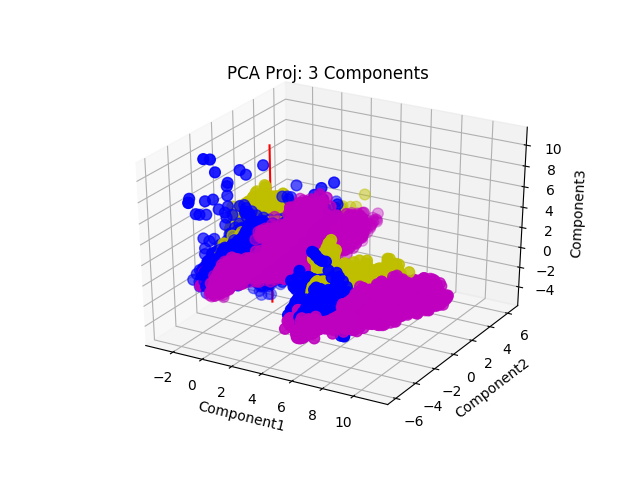

<IPython.core.display.Javascript object>


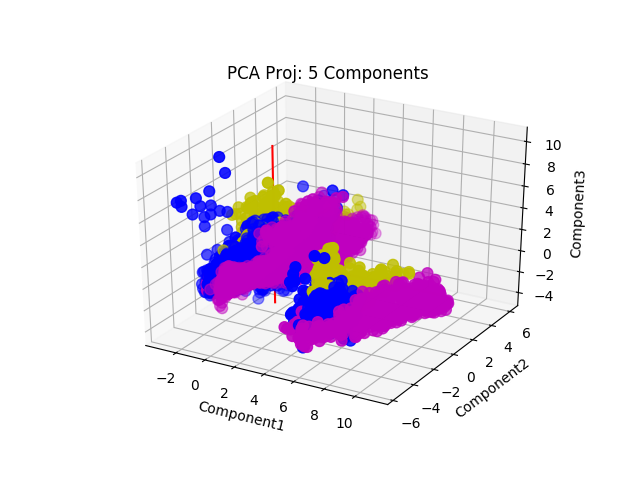

<IPython.core.display.Javascript object>


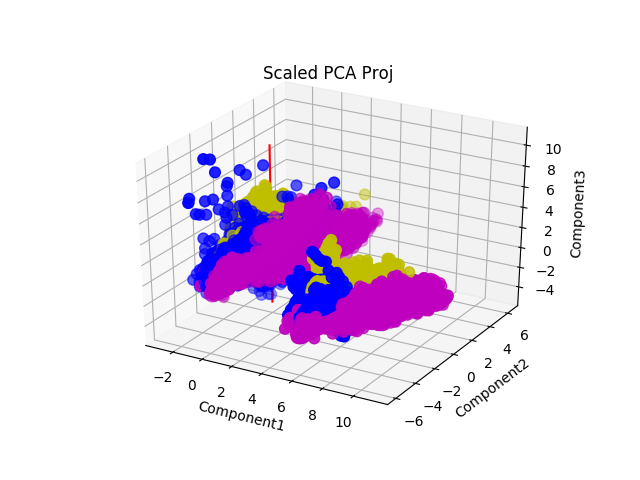

<IPython.core.display.Javascript object>


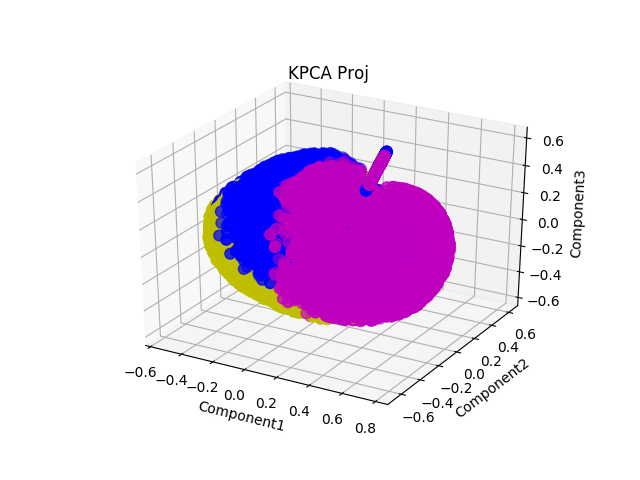

<IPython.core.display.Javascript object>


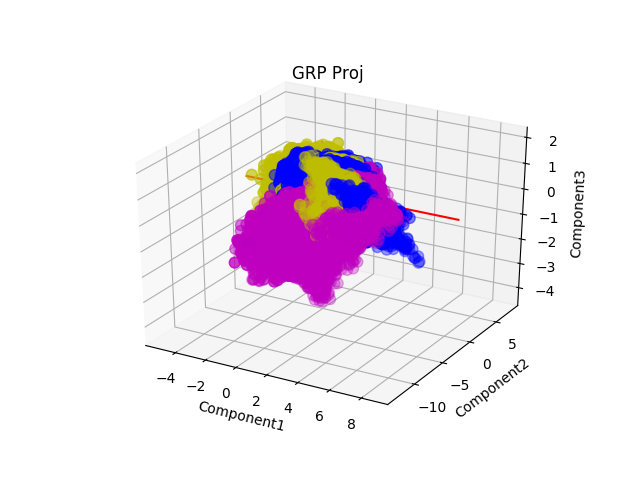

In [41]:
plot_3d(result_pca, "PCA Proj: 3 Components")
plot_3d(result_pca_5, "PCA Proj: 5 Components")
plot_3d(scaled_result, "Scaled PCA Proj")

kernel_result['label'] = label_train
plot_3d(kernel_result, "KPCA Proj")
plot_3d(grp_result, "GRP Proj")



<IPython.core.display.Javascript object>


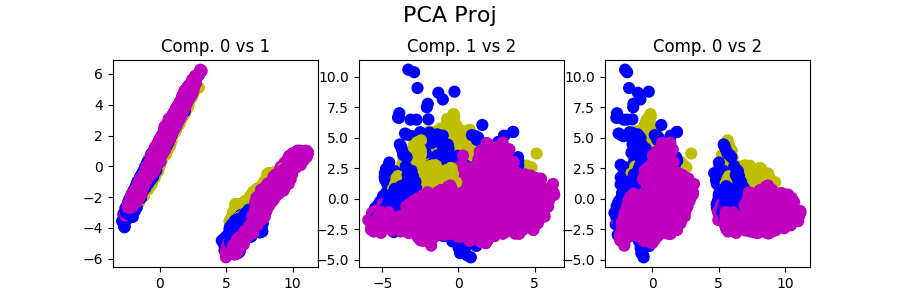

<IPython.core.display.Javascript object>


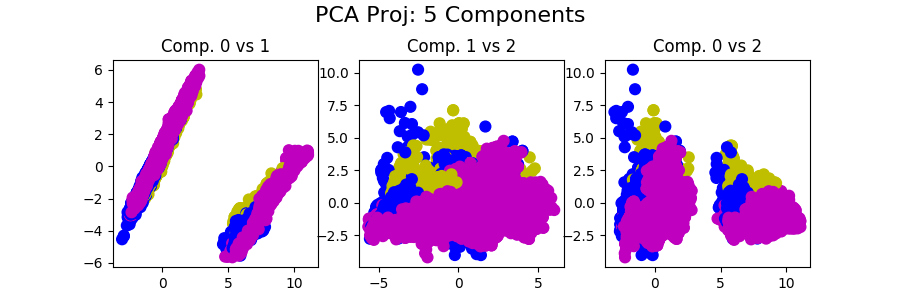

<IPython.core.display.Javascript object>


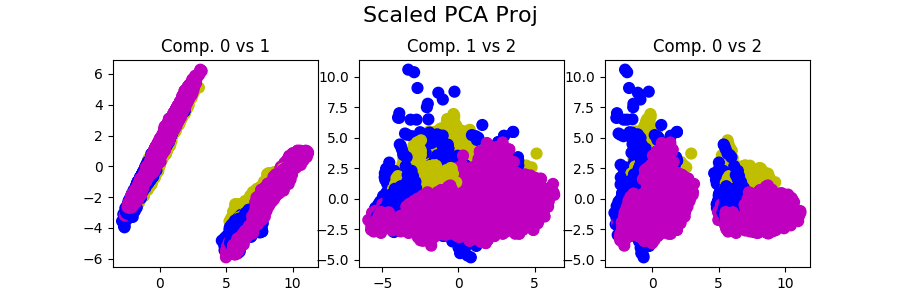

<IPython.core.display.Javascript object>


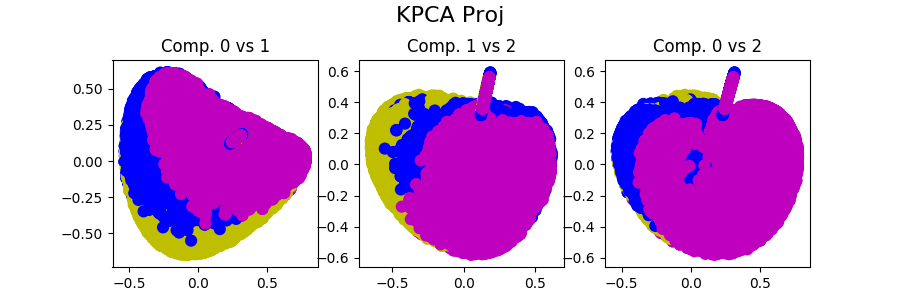

<IPython.core.display.Javascript object>


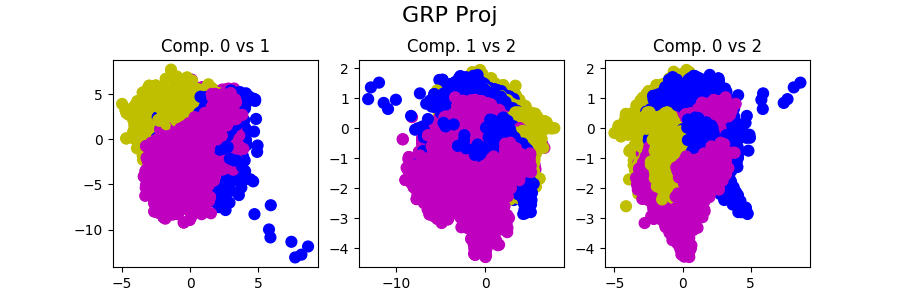

In [42]:
plot_crosses(result_pca, "PCA Proj")
plot_crosses(result_pca_5, "PCA Proj: 5 Components")
plot_crosses(scaled_result, "Scaled PCA Proj")
plot_crosses(kernel_result, "KPCA Proj")
# plot_crosses(sckernel_result, "scKPCA Proj")
# plot_crosses(mds_result, "MDS: Cromagram")
# plot_crosses(iso_result, "ISOMAP: Chromagram")
plot_crosses(grp_result, "GRP Proj")

## Append the guess next to the correct label on dataframes. So can see where the classifier messed up

## IGNORE AFTER HERE

In [ ]:
# log_train, log_test = log_reg_pred(ent_test, sckernel_result, sckPCA) 
# #data to project, already projected data, 
# k_train, k_test = kNN_pred(ent_test,sckernel_result, sckPCA)

# s_train, s_test = svm_pred(ent_test,sckernel_result, sckPCA)
# kern_s_train, kern_s_test = kernel_svm_pred(ent_test,sckernel_result, sckPCA)

# d_train, d_test = dt_pred(ent_test, sckernel_result, sckPCA)

In [ ]:
# report_dict = {'Train Acc': [log_train, k_train, s_train, kern_s_train,d_train], 
#                'Test Acc': [log_test, k_test, s_test, kern_s_test, d_test], 
#                'Name': ['LR', 'kNN', 'SVM', 'KSVM', 'DT']}
# report_df = pd.DataFrame(data=report_dict)
# report_df.set_index('Name', inplace=True)
# print("Chromagram Kernel PCA")
# report_df

In [ ]:
## making extra special sure not changing the results 
ent_train_copy_pca = np.copy(ent_train)
ent_train_copy_scaled_pca = np.copy(ent_train)
ent_train_copy_kpca = np.copy(ent_train)
ent_train_copy_sckpca = np.copy(ent_train)
ent_train_copy_grp = np.copy(ent_train)

ent_test_copy_pca = np.copy(ent_test)
ent_test_copy_scaled_pca = np.copy(ent_test)
ent_test_copy_kpca = np.copy(ent_test)
ent_test_copy_sckpca = np.copy(ent_test)
ent_test_copy_grp = np.copy(ent_test)

In [ ]:
labels_train = label_train
labels_test = label_test

In [ ]:
# result_pca , pca

pca = PCA(n_components=3).fit(StandardScaler().fit_transform(ent_train))
print(PCA)
pca_feature_train = pca.transform(ent_train)
pca_feature_test = pca.transform(ent_test)


result_pca =pd.DataFrame(pca_features, columns=['Component%i' % i for i in range(3)])
result_pca['label'] = labels_train

In [ ]:
print(pca_feature_train[2], label_train[2])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3).fit(pca_feature_train, label_train)
k_train = knn.score(pca_feature_train, label_train)
k_test = knn.score(pca_feature_test, label_test)
print('knn', k_test)


svm = LinearSVC().fit(pca_feature_train, label_train)
s_train = svm.score(pca_feature_train, label_train)
s_test = svm.score(pca_feature_test, label_test)
print('svm', s_test)

ksvm = SVC(gamma=.0005, kernel='rbf').fit(pca_feature_train, label_train)
kern_s_train = ksvm.score(pca_feature_train, label_train)
kern_s_test = ksvm.score(pca_feature_test, label_test)
print('ksvm', kern_s_test)


dtree = tree.DecisionTreeClassifier(max_leaf_nodes=3).fit(pca_feature_train, label_train)
d_train = dtree.score(pca_feature_train, label_train)
d_test = dtree.score(pca_feature_test, label_test)
print('dt', d_test)

# new_result_train = old_result_train[['Component0', 'Component1','Component2']]
lr = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42).fit(pca_feature_train, label_train)
log_train = lr.score(pca_feature_train, label_train)
log_test = lr.score(pca_feature_test, label_test)
print('lr', log_test)

In [ ]:
def fit_red_models(reduced_feats_train, reduced_feats_test):
    knn = KNeighborsClassifier(n_neighbors=3).fit(reduced_feats_train, label_train)
    k_train = knn.score(reduced_feats_train, label_train)
    k_test = knn.score(reduced_feats_test, label_test)
    print('knn', k_test)


    svm = LinearSVC().fit(reduced_feats_train, label_train)
    s_train = svm.score(reduced_feats_train, label_train)
    s_test = svm.score(reduced_feats_test, label_test)
    print('svm', s_test)

    ksvm = SVC(gamma=.0005, kernel='rbf').fit(reduced_feats_train, label_train)
    kern_s_train = ksvm.score(reduced_feats_train, label_train)
    kern_s_test = ksvm.score(reduced_feats_test, label_test)
    print('ksvm', kern_s_test)


    dtree = tree.DecisionTreeClassifier(max_leaf_nodes=3).fit(reduced_feats_train, label_train)
    d_train = dtree.score(reduced_feats_train, label_train)
    d_test = dtree.score(reduced_feats_test, label_test)
    print('dt', d_test)

    # new_result_train = old_result_train[['Component0', 'Component1','Component2']]
    lr = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42).fit(reduced_feats_train, label_train)
    log_train = lr.score(reduced_feats_train, label_train)
    log_test = lr.score(reduced_feats_test, label_test)
    print('lr', log_test)
    
    
    return(log_train, k_train, s_train, kern_s_train,d_train,log_test, k_test, s_test, kern_s_test, d_test)

In [ ]:
log_train, k_train, s_train, kern_s_train,d_train,log_test, 
k_test, s_test, kern_s_test, 
d_test = fit_red_models(pca_feature_train, pca_feature_test);



In [ ]:
report_dict = {'Train Acc': [log_train, k_train, s_train, kern_s_train,d_train], 
               'Test Acc': [log_test, k_test, s_test, kern_s_test, d_test], 
               'Name': ['LR', 'kNN', 'SVM', 'KSVM', 'DT']}
report_df = pd.DataFrame(data=report_dict)
report_df.set_index('Name', inplace=True)
print("PCA: 5 PCs")
report_df

### do with 5 PCS


In [ ]:
pca = PCA(n_components=5).fit(StandardScaler().fit_transform(ent_train))
print(PCA)
pca_feature_train = pca.transform(ent_train)
pca_feature_test = pca.transform(ent_test)


result_pca =pd.DataFrame(pca_features, columns=['Component%i' % i for i in range(3)])
result_pca['label'] = labels_train

In [ ]:
log_train, k_train, s_train, kern_s_train,d_train,log_test, 
k_test, s_test, kern_s_test, 
d_test = fit_red_models(pca_feature_train, pca_feature_test);


In [ ]:
report_dict = {'Train Acc': [log_train, k_train, s_train, kern_s_train,d_train], 
               'Test Acc': [log_test, k_test, s_test, kern_s_test, d_test], 
               'Name': ['LR', 'kNN', 'SVM', 'KSVM', 'DT']}
report_df = pd.DataFrame(data=report_dict)
report_df.set_index('Name', inplace=True)
print("PCA: 5 PCs")
report_df

In [ ]:
# log_train, log_test = log_reg_pred(ent_test, result_pca , pca) 
# #data to project, already projected data, 
# k_train, k_test = kNN_pred(ent_test,result_pca , pca)

# s_train, s_test = svm_pred(ent_test,result_pca , pca)
# kern_s_train, kern_s_test = kernel_svm_pred(ent_test,result_pca , pca)

# d_train, d_test = dt_pred(ent_test, result_pca , pca)

In [ ]:
# report_dict = {'Train Acc': [log_train, k_train, s_train, kern_s_train,d_train], 
#                'Test Acc': [log_test, k_test, s_test, kern_s_test, d_test], 
#                'Name': ['LR', 'kNN', 'SVM', 'KSVM', 'DT']}
# report_df = pd.DataFrame(data=report_dict)
# report_df.set_index('Name', inplace=True)
# print("Chromagram Kernel PCA")
# report_df

In [ ]:
# knn = KNeighborsClassifier(n_neighbors=3).fit(ent_train, label_train)
# k_train = knn.score(ent_train, label_train)
# k_test = knn.score(ent_test, label_test)
# print('knn', k_test)


# svm = LinearSVC().fit(ent_train, label_train)
# s_train = svm.score(ent_train, label_train)
# s_test = svm.score(ent_test, label_test)
# print('svm', s_test)

# ksvm = SVC(gamma=.005, kernel='rbf').fit(ent_train, label_train)
# kern_s_train = ksvm.score(ent_train, label_train)
# kern_s_test = ksvm.score(ent_test, label_test)
# print('ksvm', kern_s_test)


# dtree = tree.DecisionTreeClassifier(max_leaf_nodes=3).fit(ent_train, label_train)
# d_train = dtree.score(ent_train, label_train)
# d_test = dtree.score(ent_test, label_test)
# print('dt', d_test)

# # new_result_train = old_result_train[['Component0', 'Component1','Component2']]
# lr = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42).fit(ent_train, label_train)
# log_train = lr.score(ent_train, label_train)
# log_test = lr.score(ent_test, label_test)
# print('lr', lpog_test)

In [ ]:
# def plot_3d(result, title):
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
    
#     colors = {1:'m', 2:'y', 3:'b'}

#     ax.scatter(result['Component0'], result['Component1'], result['Component2'], 
#                c=result['label'].apply(lambda x: colors[x]), s=60)
#     xAxisLine = ((min(result['Component0']), max(result['Component0'])), (0, 0), (0,0))
#     ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
#     yAxisLine = ((0, 0), (min(result['Component1']), max(result['Component1'])), (0,0))
#     ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
#     zAxisLine = ((0, 0), (0,0), (min(result['Component2']), max(result['Component2'])))
#     ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

#     # label the axes
#     ax.set_xlabel("Component1")
#     ax.set_ylabel("Component2")
#     ax.set_zlabel("Component3")
#     ax.set_title(title)